Support Vector Machine (SVM)
==
Este método nos permite resolver problemas de clasificación lineal.
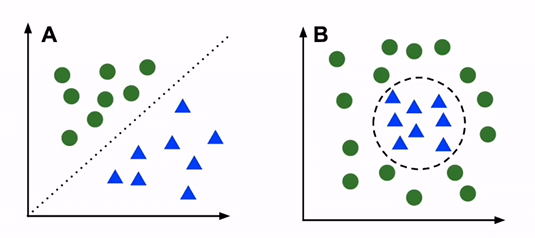
Acá hay dos clusters. Esos datos son separables mediante una recta o un hiperplano?
- caso A: es posible
- caso B: es imposible
Nos permite trabajar con problemas linealmente resolubles.
Hay una extención que permite resolver problemas del tipo B.
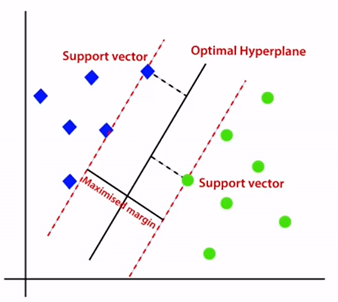
El método consiste en trazar una función (*función de decisión*). Toma ciertos puntos de soporte (perpendicular a la función de decisión) y maximizar el margen que generan esos puntos, esos vectores de soporte (que se corresponden a algún dato de soporte)

#### Figura B

Si aumentamos la dimensionalidad del sistema, podemos imaginar que los datos verdes están más profundos que los datos azules entonces ahora puedo graficar un plano que los separe.
>El truco del kernell consiste en aumentar la dimensionalidad del problema para transformar el problema en uno linealmente separable. Desventaja: si el problema es complicado (imagenes) entonces se complica, es menos eficiente computacionalmente

Numero de muestras bajo comparado con la dimensionalidad del problema. 
**Ventaja**: usa solo un conjunto de puntos de entrenamiento para generar la función de decición -> eficiente en el uso de memoria.
___
Los algoritmo SVMs (*Support Vector Machines*) son un conjunto de metodos de aprendizaje automático supervisado usados para clasificación, regresión y detección de anomalias (*outliers*).

Entre las ventajas de esta familia de algoritmos se encuentran:

- Utiles para problemas de dimensionalidad alta.
- Utiles cuando el numero de muestras de entrenamiento es relativamente bajo comparado con la dimensionalidad del problema.
- Usa solo un sub-conjunto de puntos de entramiento para la funcion de decision, por lo que es eficiente en el uso de memoria.


Sin embargo, los clasificacores SVM necesitan de algun metodo de regularizacion cuando el numero de *features* es mucho mas grande que el numero de muestras de entrenamiento. Ademas la salida del modelo puede ser dificil de intrepretar ya que en el caso mas basico, no es directamente una probabilidad.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# el módulo que corresponde a la familia de algoritmos
from sklearn import svm, datasets

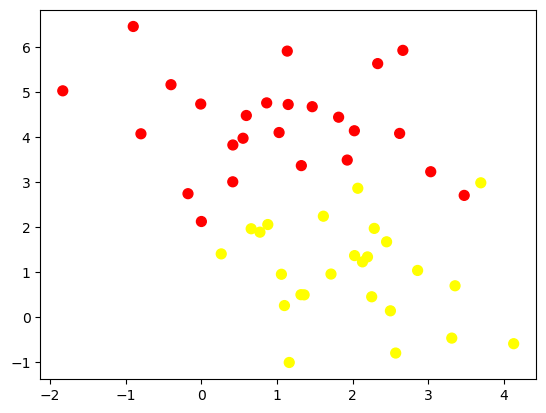

In [8]:
# función make blobs:
#  *  50 muestras repartidas
#  *  en 2 centros
#  * con una disperción de 0,60
X, y = datasets.make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 1.1)

# graficamos para ver cómo se distribuyen los puntos
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn');

In [13]:
# después vemos un caso no lineal
model = svm.SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

# C: parámetro de regularización. 
# Es muy importante para equilibrar la solución entre el margen que usamos
# y el núm. de ptos. que son clasificados erroneamente
# en función de C la solución obtenida va a ser diferente.
# valor por default es 1. acá estamos probando con un valor GRANDE

# kernel: el tipo que estamos usando

SVC(C=10000000000.0, kernel='linear')

In [14]:
# a partir de los datos del modelo entrenado podemos graficar la función
# de desición en el espacio donde estan los datos
def plot_svc_decision_function(model, ax = None, plot_support = True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

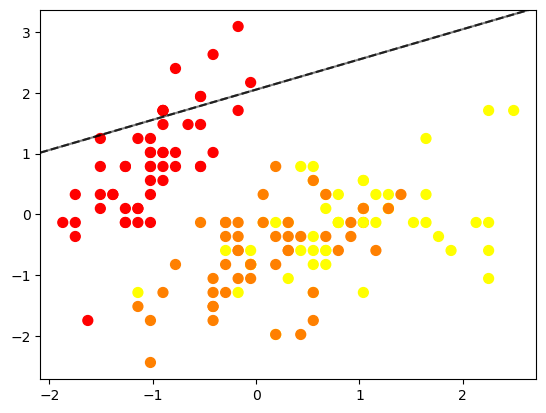

In [31]:
# llamamos la función con nuestro modelo
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

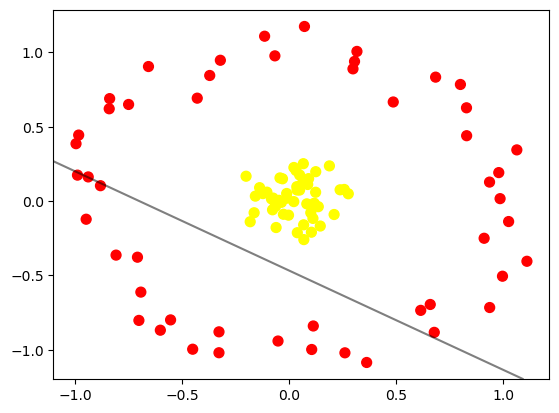

In [22]:
# Problema no lineal: aumento la dimensión del problema
# "los ptos amarillos se encuentran adelante" -> eso es lo que hace el kernel rbf

# funcion make_circles: datos que se agrupan de manera circular
X, y = datasets.make_circles(100, factor = .1, noise = .1)

clf = svm.SVC(kernel = 'linear').fit(X, y)

# Obviamente esto es HORRIBLE
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf, plot_support=False);

In [23]:
# Kernel rbf: "radial basis function kernel"
clf = svm.SVC(kernel = 'rbf', C = 1E10)
clf.fit(X, y)


SVC(C=10000000000.0)

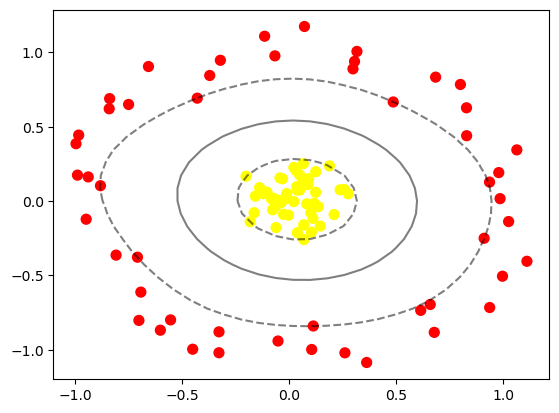

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# llamamos nuevamente a nuestra función
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

SGD
==
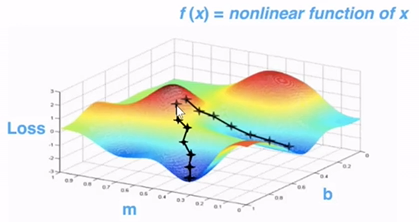
Gradiente descendiente: sigue al minimo local. Minimiza el error.
Desventaja: depende de donde empecemos podemos llegar a dos minimos locales distintos, y cual es el mínimo más mínimo? no lo sabemos. A veces podemos quedar atrapados en un mínimo que no es el óptimo (el global)

Manera de solucionar el problema: agg una variable aleatoria (un componente estocástico). De esa manera la inyección de energía o aleatoriedad nos permite salir de esos mínimos locales y tratar de converger a un mínimo global.
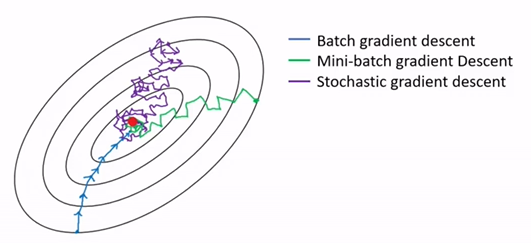
Lo que podemos hacer es trabajar con mini-bach: agrega aleatoriedad al problema.

___
*scikit-learn* nos ofrece tambien la clase SGD (*Stochastic Gradient Descent*) la cual conglomera distintos clasificadores lineales en una sola herramienta.

La clase SGD no se asocia a una familia especifica de clasificadores, si no que a un metodo de optmizacion en el entrenamiento (**gradiente descendiente estocastico**) y nos permite entrenar modelos con diferentes clasificadores.

Por ejemplo, usar **SGDClassifier**(loss='log') resulta en un clasificador por regresion logistica, equivalente a utilizar la clase **LogisticRegression**().

La utilidad de esta clase esta en su eficiencia de computo para problemas grandes, y en la habilidad de facilmente comparar el resultado de diferentes clasificadores en pocas lineas de codigo.
___
#### Esto es una técnica de optimización
Es útil para clasificar datos

(-2.8700241338470187, 3.489975866152987, -3.433947141908086, 4.086052858091921)

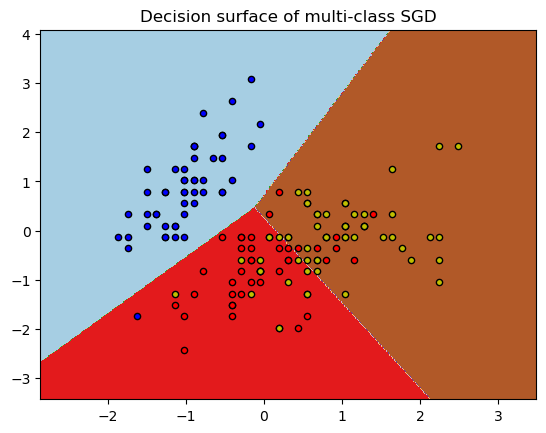

In [56]:
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2] # nos quedamos con dos dimensiones del dataset
y = iris.target
colors = "bry"

# shuffle - preprocesamiento de los datos
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize - lo estandarizamos
# restamos la media y dividimos por el desvío estándar de los datos
mean = X.mean(axis = 0)
std = X.std(axis = 0)
X = (X - mean) / std

h = .02  # step size in the mesh

# loss es la función de costo. De esa manera probamos != clasificadores lineales
# VER LA DOCUMENTACIÓN DE ESTA FUNCIÓN
# log = regresión logística multiclase
# loss='hinge' llamamos al método de suport vector machine SVM
clf = SGDClassifier(loss = 'log', alpha = 0.001, max_iter = 100).fit(X, y) 

# -----------------------------------
# --- A PARTIR DE ACÁ ES GRAFICAR ---
# -----------------------------------

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')
